## Intro to Transformers

### Dataset


In [1]:
# https://arxiv.org/pdf/2005.12872




In [2]:
# [1, 2, 3, 4, 5, 6, 0, 0, 0, 0] => [6, 5, 4, 3, 2, 1]

# Autoregressive  vs Oneshot (Predict all six numbers at once)

import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

def generate_examples(num_examples):
    min_size = 4
    max_len = 15
    examples = []
    for _ in range(num_examples):
        # random_size = torch.randint(low=min_size, high=max_len, size=(1,))
        random_size = max_len
        input_seq = torch.randint(low=0, high=10, size=(random_size,))
        output_seq = torch.flip(input_seq, dims=(0,))


        # Padding
        # l = max_len - len(input_seq)
        # input_seq = F.pad(input_seq, (0, l))
        # output_seq = F.pad(output_seq, (0, l))
        examples.append([input_seq, output_seq])
    return examples



NUM_EXAMPLES = 20000
class FlipDataset(Dataset):
    def __init__(self, examples, split, train_split = 0.5):

        cutoff = int(train_split * len(examples))
        if split == "train":
            self.examples = examples[:cutoff]
        elif split == "test":
            self.examples = examples[cutoff:]

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return examples[idx]

examples = generate_examples(num_examples=NUM_EXAMPLES)
train_dataset = FlipDataset(examples, "train")
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)

test_dataset = FlipDataset(examples, "test")
test_dataloader = DataLoader(test_dataset, batch_size=64, num_workers=0)


next(iter(train_dataloader))[0][0]

tensor([7, 8, 6, 0, 1, 4, 5, 6, 8, 4, 7, 6, 7, 2, 0])

In [3]:
for x,y in train_dataloader:
    print(x.shape, y.shape)
    print(x, y)
    break
next(iter(train_dataloader))[1][0]

torch.Size([64, 15]) torch.Size([64, 15])
tensor([[6, 0, 9, 6, 4, 6, 4, 0, 7, 4, 6, 0, 6, 3, 3],
        [2, 2, 8, 8, 1, 2, 6, 9, 3, 8, 4, 4, 1, 7, 5],
        [0, 8, 2, 7, 5, 0, 7, 2, 6, 9, 8, 5, 5, 9, 4],
        [5, 7, 6, 8, 5, 3, 9, 9, 2, 6, 1, 9, 8, 4, 4],
        [7, 8, 5, 0, 6, 8, 9, 1, 6, 4, 3, 9, 7, 3, 7],
        [7, 6, 4, 4, 9, 9, 8, 0, 7, 5, 3, 0, 7, 9, 1],
        [6, 6, 1, 1, 0, 5, 2, 7, 1, 2, 9, 4, 0, 6, 7],
        [2, 7, 8, 5, 4, 7, 8, 0, 6, 2, 8, 0, 9, 1, 0],
        [1, 1, 3, 5, 5, 1, 1, 6, 8, 8, 0, 8, 5, 3, 4],
        [5, 4, 8, 5, 0, 0, 9, 5, 9, 3, 0, 1, 4, 8, 3],
        [5, 6, 0, 3, 7, 3, 1, 9, 2, 7, 3, 3, 9, 3, 3],
        [6, 5, 8, 7, 3, 5, 2, 5, 4, 8, 0, 1, 7, 1, 5],
        [1, 2, 4, 2, 4, 3, 5, 2, 4, 3, 4, 6, 4, 5, 9],
        [4, 9, 2, 6, 8, 2, 7, 1, 1, 9, 1, 1, 7, 0, 8],
        [4, 3, 4, 8, 2, 3, 7, 5, 3, 7, 3, 7, 3, 7, 7],
        [9, 5, 5, 4, 5, 9, 3, 5, 3, 9, 8, 9, 9, 9, 5],
        [5, 3, 8, 0, 2, 0, 0, 2, 1, 3, 3, 7, 0, 5, 0],
        [3, 3, 1, 7, 4,

tensor([9, 9, 8, 9, 4, 0, 0, 3, 9, 6, 9, 8, 5, 3, 8])

In [4]:
next(iter(train_dataloader))[0][1]

tensor([6, 7, 8, 3, 4, 0, 4, 4, 5, 6, 8, 9, 2, 7, 4])

## Model

In [5]:
# import torch.nn as nn

# class SimpleModel(nn.Module):
#     def __init__(self, in_channels, hidden_dim, out_channels):
#         super(SimpleModel, self).__init__()
#         self.layers = nn.Sequential(
#             nn.Linear(in_channels, hidden_dim),
#             nn.ReLU(),
#             nn.Linear(hidden_dim, hidden_dim),
#             nn.ReLU(),
#             nn.Linear(hidden_dim, out_channels)
#         )

#     def forward(self, x):
#         return self.layers(x)

# import torch
# import torch.nn as nn



# def train_and_evaluate(model, train_dataloader, test_dataloader, n_epochs, device="cpu"):
#     model.to(device)
#     optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.1)
#     loss_fn = torch.nn.MSELoss()
#     results = []

#     def accuracy(preds, labels):
#         # Ensure the predictions and labels are in the same device
#         preds = preds.to(labels.device)
#         # Calculate the number of element-wise matches
#         correct = (preds == labels).sum().item()
#         # Calculate total number of elements
#         total = preds.numel()
#         # Calculate accuracy
#         return correct / total

#     for epoch in range(n_epochs):
#         running_loss = 0.0

#         # Training loop
#         model.train()
#         for i, data in enumerate(train_dataloader):
#             inputs, labels = data
#             inputs = inputs.to(device).float()
#             labels = labels.to(device).float()

#             optimizer.zero_grad()
#             outputs = model(inputs)

#             loss = loss_fn(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#         train_loss = running_loss / len(train_dataloader)

#         # Evaluation loop
#         model.eval()
#         test_loss = 0.0
#         correct_preds = 0
#         total_preds = 0

#         with torch.no_grad():
#             for data in test_dataloader:
#                 inputs, labels = data
#                 inputs = inputs.to(device).float()
#                 labels = labels.to(device).float()

#                 outputs = model(inputs)
#                 loss = loss_fn(outputs, labels)
#                 test_loss += loss.item()

#                 preds = outputs.int()
#                 correct_preds += (preds == labels.int()).sum().item()
#                 total_preds += preds.numel()

#         test_loss /= len(test_dataloader)
#         test_accuracy = correct_preds / total_preds

#         results.append({
#             "epoch": epoch + 1,
#             "train_loss": train_loss,
#             "test_loss": test_loss,
#             "test_accuracy": test_accuracy
#         })

#         # print(f'Epoch {epoch + 1}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}')

#     return results

# # Example usage


# DEVICE = "cpu"
# N_EPOCHS = 5000
# model = SimpleModel(8, 256, 8)
# model.to(DEVICE)
# results = train_and_evaluate(model, train_dataloader, test_dataloader, N_EPOCHS, DEVICE)
# import matplotlib.pyplot as plt

# def plot_metrics(results):
#     epochs = [result["epoch"] for result in results]
#     train_losses = [result["train_loss"] for result in results]
#     test_losses = [result["test_loss"] for result in results]
#     test_accuracies = [result["test_accuracy"] for result in results]

#     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#     # Plot losses
#     ax1.plot(epochs, train_losses, label='Train Loss')
#     ax1.plot(epochs, test_losses, label='Test Loss')
#     ax1.set_title('Train and Test Loss')
#     ax1.set_xlabel('Epoch')
#     ax1.set_ylabel('Loss')
#     ax1.legend()
#     ax1.grid(True)
#     ax1.set_ylim(0, 1)

#     # Plot accuracy
#     ax2.plot(epochs, test_accuracies, label='Test Accuracy', color='g')
#     ax2.set_title('Test Accuracy')
#     ax2.set_xlabel('Epoch')
#     ax2.set_ylabel('Accuracy')
#     ax2.legend()
#     ax2.grid(True)

#     plt.tight_layout()
#     plt.show()
# plot_metrics(results)











In [6]:
import torch
import torch.nn.functional as F
import torch.nn as nn

# Placeholder implementation for MultiHeadAttention
class MultiHeadAttention(nn.Module):
    def __init__(self, seq_len, d_model, n_heads):
        super(MultiHeadAttention, self).__init__()

        self.head_dim = d_model // n_heads
        self.n_heads = n_heads
        self.d_model = d_model

        self.q_proj = nn.Linear(d_model, d_model)
        self.k_proj = nn.Linear(d_model, d_model)
        self.v_proj = nn.Linear(d_model, d_model)

        self.out_proj = nn.Linear(d_model, d_model)


    def split_into_heads(self, x, batch_size, seq_len, n_heads, head_dim):
        return x.view(batch_size, n_heads, seq_len, head_dim)


    def forward(self, keys, queries, values, attention_mask=None):

        # keys: [B, S, d]
        # queries: [B, S, d]
        B, Sk, D = keys.shape
        B, Sq, D = queries.shape

        Q = self.q_proj(queries) # [B, Sq, d_model]
        K = self.k_proj(keys) # [B, Sk, d_model]
        V = self.v_proj(values) # [B, Sk, d_model]


        Q = self.split_into_heads(Q, B, Sq, self.n_heads, self.head_dim) # [B, n_heads, Sq, d_head]
        K = self.split_into_heads(K, B, Sk, self.n_heads, self.head_dim) # [B, n_heads, Sk, d_head]
        V = self.split_into_heads(V, B, Sk, self.n_heads, self.head_dim) # [B, n_heads, Sk, d_head]

        # Split into heads
        # scaled_dot_product_attention = torch.einsum("bhqd,bhkd->bhqk", Q, K)
        # scaled_dot_product_attention = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))  # [B, n_heads, seq_len_q, seq_len_k]
        scaled_dot_product_attention = (Q @ K.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32)) # [B, n_heads, seq_len_q, seq_len_k]
        if attention_mask is not None:
            scaled_dot_product_attention += attention_mask
        scaled_dot_product_attention = F.softmax(scaled_dot_product_attention, dim = -1)

        output = scaled_dot_product_attention @ V
        output = output.view(B, Sq, self.d_model)
        output = self.out_proj(output)

        return output, scaled_dot_product_attention

class TransformerEncoderLayer(nn.Module):
    def __init__(self, seq_len, d_model, n_heads):

        super(TransformerEncoderLayer, self).__init__()
        hidden_dim = d_model * 4
        self.mha = MultiHeadAttention(seq_len, d_model, n_heads)
        self.layernorm1 = nn.LayerNorm(d_model)
        self.layernorm2 = nn.LayerNorm(d_model)
        self.feedforward = nn.Sequential(
            nn.Linear(d_model, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, d_model)
        )

    def forward(self, x):
        residual = x
        x, attentions = self.mha(keys=x, queries=x, values=x)
        x = x + residual  # add skip connection
        x = self.layernorm1(x)

        residual = x
        x = self.feedforward(x)
        x = x + residual  # add skip connection
        x = self.layernorm2(x)

        return x, attentions

class TransformerEncoder(nn.Module):
    def __init__(self, seq_len, d_model, num_layers):
        super(TransformerEncoder, self).__init__()
        self.layers = nn.ModuleList([TransformerEncoderLayer(seq_len, d_model, n_heads=8) for _ in range(num_layers)])

    def forward(self, x):
        all_att = []
        for layer in self.layers:
            x, attentions = layer(x)
            all_att.append(attentions)

        return x, all_att

class PositionalEncoding(nn.Module):
    def __init__(self, seq_len, d_model):
        super(PositionalEncoding, self).__init__()

        # Create a positional encoding matrix using indices
        P = torch.arange(seq_len).unsqueeze(1).expand(seq_len, d_model).float()
        self.register_buffer('pos_encoding', P)

    def forward(self, x):
        # Add positional encoding to the input embeddings
        return x + self.pos_encoding


# class PositionalEncoding(nn.Module):
#     """
#     https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/
#     """

#     def __init__(self, seq_len, d_model, n=10000):
#         super(PositionalEncoding, self).__init__()

#         P = torch.zeros((seq_len, d_model))
#         for k in range(seq_len):
#             for i in torch.arange(int(d_model/2)):
#                 denominator = torch.pow(n, 2*i/d_model)
#                 P[k, 2*i] = torch.sin(k/denominator)
#                 P[k, 2*i+1] = torch.cos(k/denominator)
#         self.register_buffer('P', P.unsqueeze(0))


#     def forward(self, x):
#         return x + self.P


class MyModel(nn.Module):
    def __init__(self, seq_len=8, num_layers=2, d_model=1024, vocab_size=10):
        super(MyModel, self).__init__()
        self.embed = nn.Embedding(vocab_size, d_model)
        self.encoder = TransformerEncoder(seq_len, d_model, num_layers=num_layers)
        self.pe = PositionalEncoding(seq_len, d_model)

        # TODO: Write decoder
        # https://www.youtube.com/watch?v=kCc8FmEb1nY&t=5883s

        # 1, 2, 3, 4 => [4, 256]
        # teacher forcing

        self.prediction_layer = nn.Linear(d_model,vocab_size)


    def forward(self, x):
        # x [B, S, 1]
        x = self.embed(x) # [B, S, D]
        x = self.pe(x) # [B, S, D]
        x, attentions = self.encoder(x)  # [B, S, D]
        x = self.prediction_layer(x)
        x = F.softmax(x, dim=-1)
        return x, attentions

# Example usage
# [B, S, 1] => [B, S, d]

m = MyModel(seq_len=7)
input_tensor = torch.randint(0, 7, (3, 7))  # Example input
output, attentions = m(input_tensor)






Epoch 1: Train Loss = 2.2917, Test Loss = 2.2715, Test Accuracy = 0.1453
Epoch 11: Train Loss = 2.0773, Test Loss = 2.0768, Test Accuracy = 0.3514
Epoch 21: Train Loss = 2.0722, Test Loss = 2.0716, Test Accuracy = 0.3596
Epoch 31: Train Loss = 2.0612, Test Loss = 2.0571, Test Accuracy = 0.3803
Epoch 41: Train Loss = 2.0388, Test Loss = 2.0294, Test Accuracy = 0.4150
Epoch 51: Train Loss = 2.0074, Test Loss = 1.9976, Test Accuracy = 0.4514
Epoch 61: Train Loss = 1.9706, Test Loss = 1.9607, Test Accuracy = 0.4934
Epoch 71: Train Loss = 1.9356, Test Loss = 1.9301, Test Accuracy = 0.5260
Epoch 81: Train Loss = 1.9047, Test Loss = 1.8926, Test Accuracy = 0.5665
Epoch 91: Train Loss = 1.8782, Test Loss = 1.8680, Test Accuracy = 0.5920
Epoch 101: Train Loss = 1.8583, Test Loss = 1.8493, Test Accuracy = 0.6109
Epoch 111: Train Loss = 1.8410, Test Loss = 1.8373, Test Accuracy = 0.6233
Epoch 121: Train Loss = 1.8285, Test Loss = 1.8205, Test Accuracy = 0.6399
Epoch 131: Train Loss = 1.8531, Test

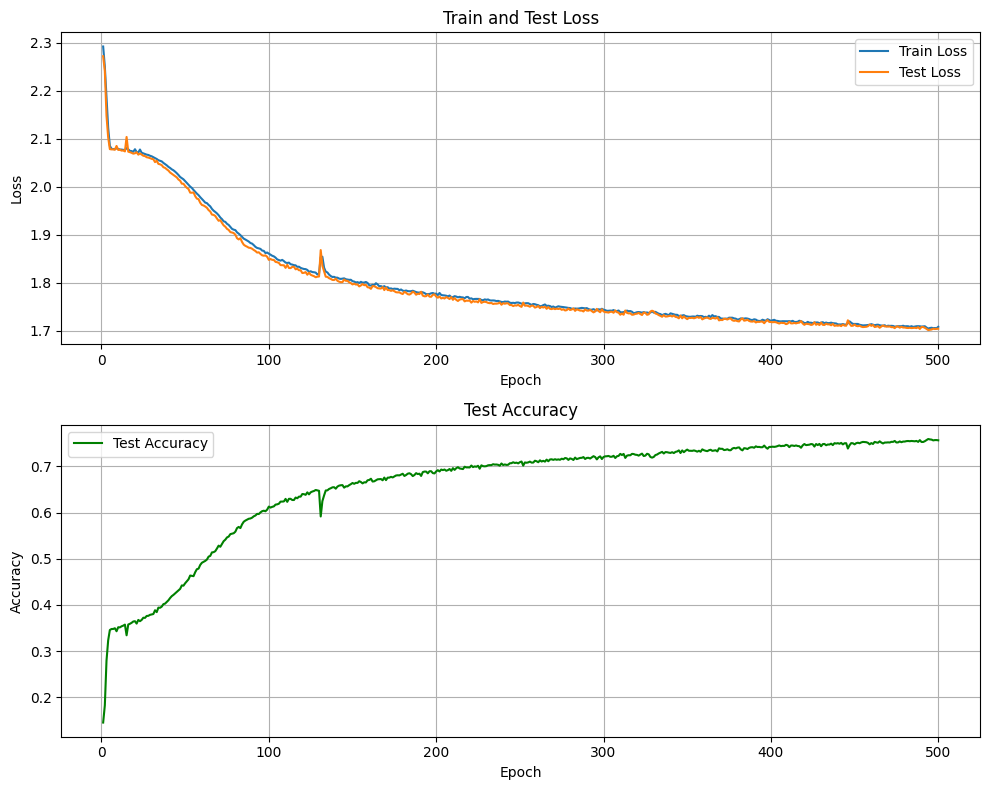

In [7]:
def train_and_evaluate(model, train_dataloader, test_dataloader, n_epochs, device="cpu"):
    model.to(device)
    # optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.1)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    loss_fn = nn.CrossEntropyLoss()
    results = []

    def accuracy(preds, labels):
        # Ensure the predictions and labels are in the same device
        preds = preds.argmax(dim=-1).to(labels.device)
        # Calculate the number of element-wise matches
        correct = (preds == labels).sum().item()
        # Calculate total number of elements
        total = preds.numel()
        # Calculate accuracy
        return correct / total

    for epoch in range(n_epochs):
        running_loss = 0.0

        # Training loop
        model.train()
        for i, data in enumerate(train_dataloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs, _ = model(inputs)

            loss = loss_fn(outputs.view(-1, outputs.size(-1)), labels.view(-1))
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_dataloader)

        # Evaluation loop
        model.eval()
        test_loss = 0.0
        correct_preds = 0
        total_preds = 0

        with torch.no_grad():
            for data in test_dataloader:
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs, _ = model(inputs)
                loss = loss_fn(outputs.view(-1, outputs.size(-1)), labels.view(-1))
                test_loss += loss.item()

                preds = outputs.argmax(dim=-1)
                correct_preds += (preds == labels).sum().item()
                total_preds += preds.numel()

        test_loss /= len(test_dataloader)
        test_accuracy = correct_preds / total_preds
        if epoch%10 == 0:
            print(f'Epoch {epoch + 1}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}')

        results.append({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "test_loss": test_loss,
            "test_accuracy": test_accuracy
        })

    return results

import matplotlib.pyplot as plt

# Visualization function
def plot_metrics(results):
    epochs = [result["epoch"] for result in results]
    train_losses = [result["train_loss"] for result in results]
    test_losses = [result["test_loss"] for result in results]
    test_accuracies = [result["test_accuracy"] for result in results]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot losses
    ax1.plot(epochs, train_losses, label='Train Loss')
    ax1.plot(epochs, test_losses, label='Test Loss')
    ax1.set_title('Train and Test Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot accuracy
    ax2.plot(epochs, test_accuracies, label='Test Accuracy', color='g')
    ax2.set_title('Test Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
N_EPOCHS = 500
model =  MyModel(seq_len=15)
model.to(DEVICE)
results = train_and_evaluate(model, train_dataloader, test_dataloader, N_EPOCHS, DEVICE)
plot_metrics(results)

# Function to visualize attention weights


# Example usage of plot_attention
# plot_attention(attentions, layer_num=0, head_num=0)



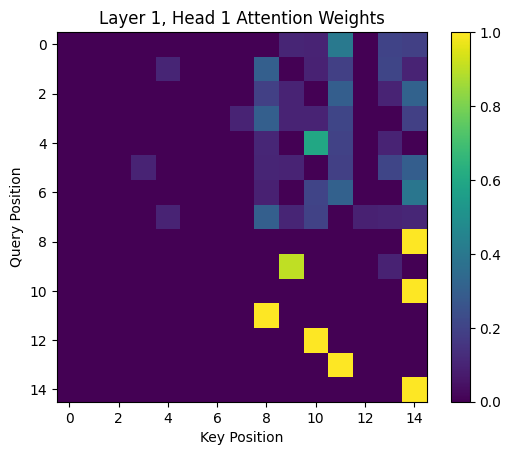

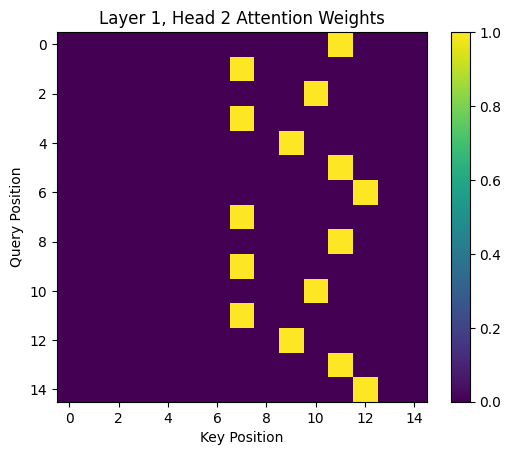

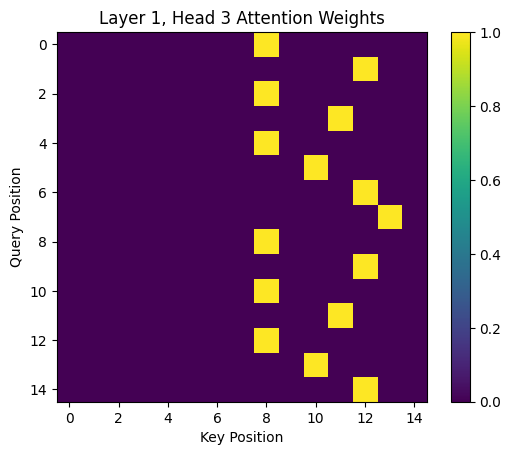

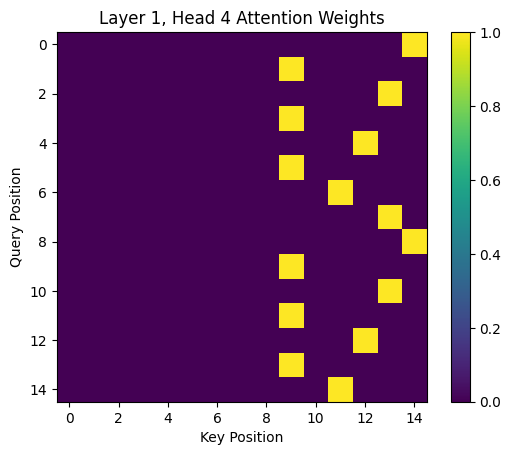

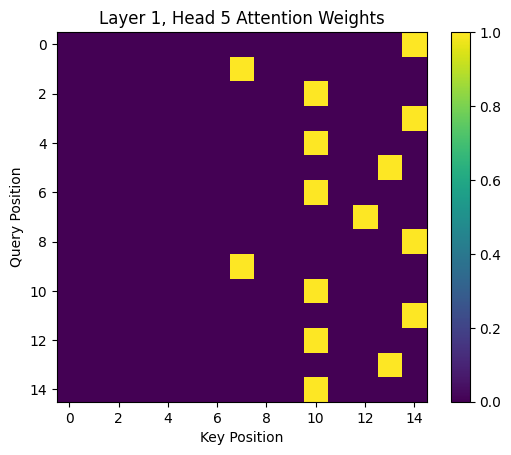

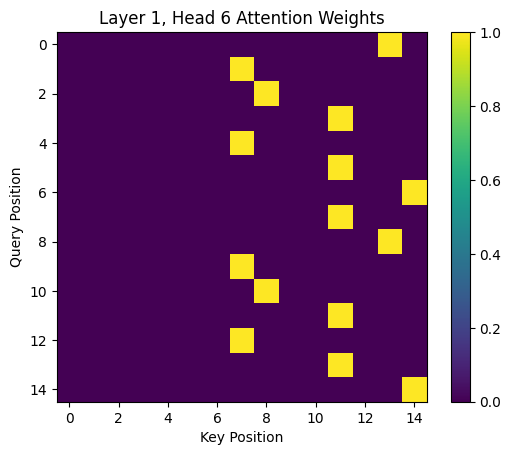

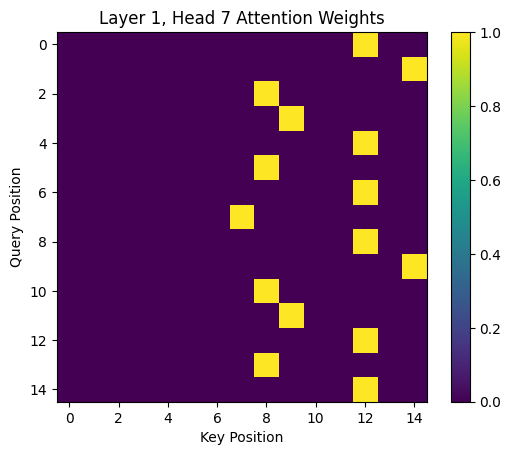

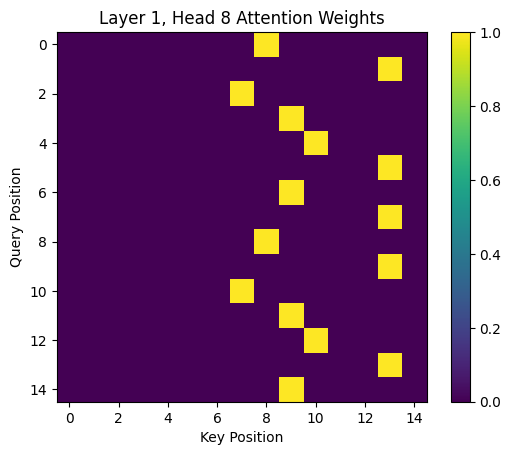

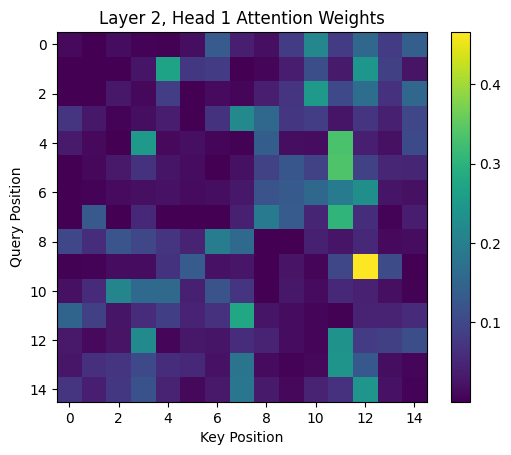

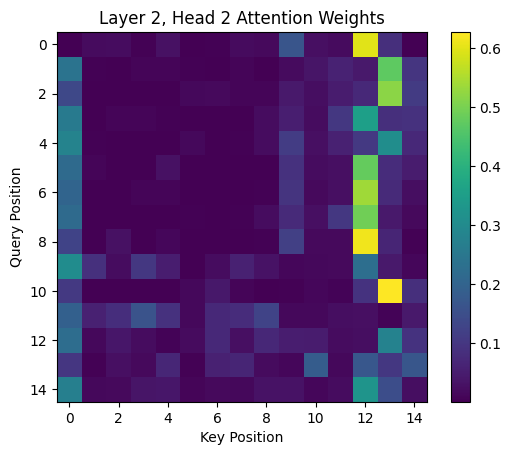

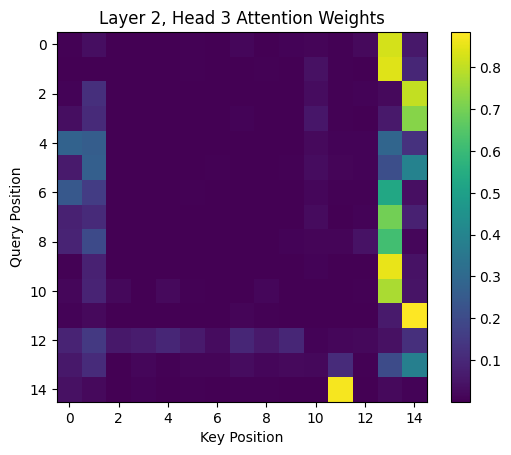

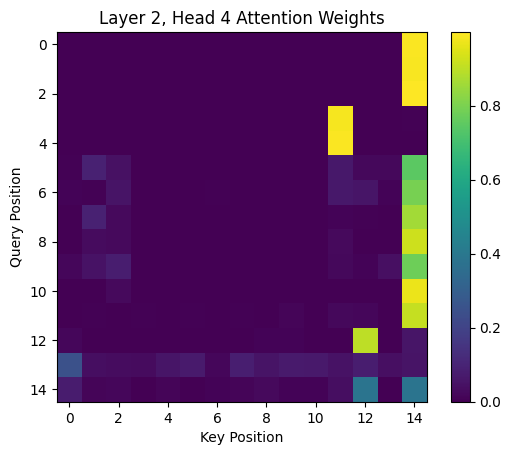

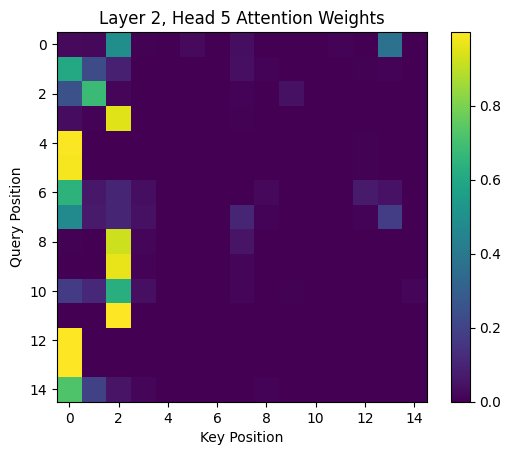

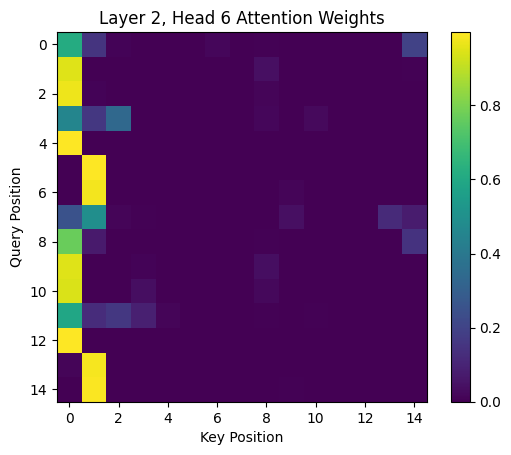

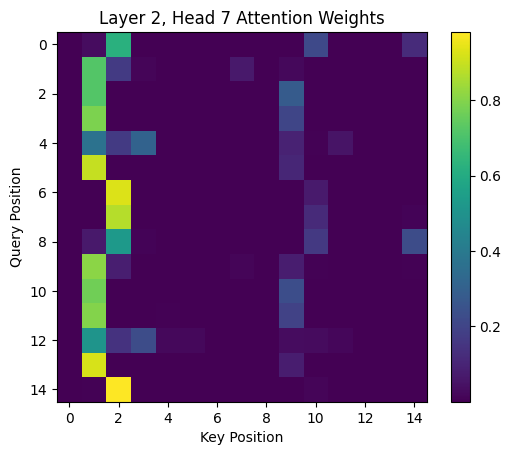

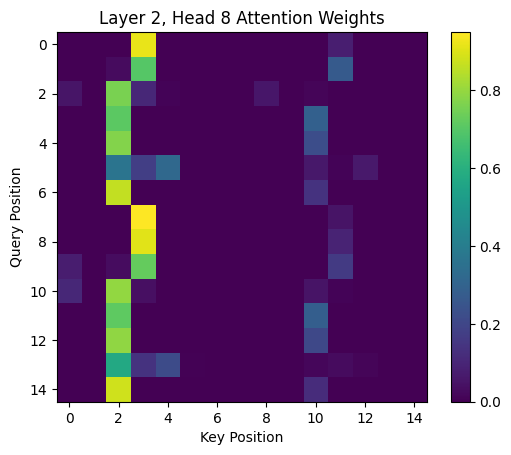

In [8]:
import matplotlib.pyplot as plt

def plot_attention(attentions, head_num=0, layer_num=0):
    attn = attentions[layer_num][head_num].detach().cpu().numpy()  # Extract the attention weights for the specified head and layer
    plt.imshow(attn, cmap='viridis')
    plt.colorbar()
    plt.title(f'Layer {layer_num + 1}, Head {head_num + 1} Attention Weights')
    plt.xlabel('Key Position')
    plt.ylabel('Query Position')
    plt.show()

with torch.no_grad():
    device = DEVICE

    total_att = None
    num_samples = 0

    for data in test_dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs, attentions = model(inputs)

        # Initialize total_att to accumulate attention weights if it's the first batch
        if total_att is None:
            total_att = [att.sum(dim=0) for att in attentions]
        else:
            for layer_idx, att in enumerate(attentions):
                total_att[layer_idx] += att.sum(dim=0)

        num_samples += inputs.size(0)

    # Average the attention weights over the total number of samples
    for layer_idx in range(len(total_att)):
        total_att[layer_idx] /= num_samples

    # Plot the attention weights for each head in each layer
    num_layers = len(total_att)
    num_heads = total_att[0].size(0)

    for layer_idx in range(num_layers):
        for head_idx in range(num_heads):
            plot_attention(total_att, head_num=head_idx, layer_num=layer_idx)


### Plan
* Build the dataset and dataloader
*

In [9]:
def func(*args, **kwargs):
    pass

func(323, 32423, t=57, y=23, trt=23)